In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('Data\processed_data_tobacco.csv')

In [7]:
df.head(5)

,YEAR,LocationAbbr,LocationDesc,TopicType,TopicDesc,MeasureDesc,DataSource,Response,Data_Value_Unit,Data_Value_Type,...,GeoLocation,TopicTypeId,TopicId,MeasureId,StratificationID1,StratificationID2,StratificationID3,StratificationID4,SubMeasureID,DisplayOrder
0,2008,AL,Alabama,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,"(32.840571122, -86.631860762)",BEH,106BEH,166SSA,3GEN,8AGE,6RAC,2EDU,YTS08,8
1,2010,AL,Alabama,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Frequent,%,Percentage,...,"(32.840571122, -86.631860762)",BEH,106BEH,166SSA,3GEN,8AGE,6RAC,2EDU,YTS09,9
2,2002,AL,Alabama,Tobacco Use – Survey Data,Cessation (Youth),Quit Attempt in Past Year Among Current Cigare...,YTS,NaN,%,Percentage,...,"(32.840571122, -86.631860762)",BEH,105BEH,169QUA,3GEN,8AGE,6RAC,2EDU,YTS06,6
3,2012,AL,Alabama,Tobacco Use – Survey Data,Cessation (Youth),Quit Attempt in Past Year Among Current Cigare...,YTS,NaN,%,Percentage,...,"(32.840571122, -86.631860762)",BEH,105BEH,169QUA,2GEN,8AGE,6RAC,2EDU,YTS05,5
4,2004,AL,Alabama,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Ever,%,Percentage,...,"(32.840571122, -86.631860762)",BEH,151BEH,169USS,2GEN,8AGE,6RAC,1EDU,YTS11,11


#### Lọc ra các dòng dữ liệu về các khảo sát vào khoảng thời gian khảo sát từ 2000 - 2016: 

In [68]:
tobacco_df = tobacco_df[tobacco_df['YEAR'] >= 2000]
tobacco_df = tobacco_df[tobacco_df['YEAR'] <= 2016]
# Thêm cột giá trị từ phần trăm và số lượng mẫu thử 
tobacco_df['Data_Number'] = tobacco_df['Data_Value'] * tobacco_df['Sample_Size'] / 100
tobacco_df.head(5)

,YEAR,LocationAbbr,LocationDesc,TopicType,TopicDesc,MeasureDesc,DataSource,Response,Data_Value_Unit,Data_Value_Type,...,TopicTypeId,TopicId,MeasureId,StratificationID1,StratificationID2,StratificationID3,StratificationID4,SubMeasureID,DisplayOrder,Data_Number
0,2008,AL,Alabama,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,BEH,106BEH,166SSA,3GEN,8AGE,6RAC,2EDU,YTS08,8,312.612
1,2010,AL,Alabama,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Frequent,%,Percentage,...,BEH,106BEH,166SSA,3GEN,8AGE,6RAC,2EDU,YTS09,9,37.968
4,2004,AL,Alabama,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Ever,%,Percentage,...,BEH,151BEH,169USS,2GEN,8AGE,6RAC,1EDU,YTS11,11,164.268
6,2014,AL,Alabama,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Frequent,%,Percentage,...,BEH,151BEH,169USS,1GEN,8AGE,6RAC,1EDU,YTS12,12,20.925
8,2010,AL,Alabama,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,BEH,106BEH,166SSA,3GEN,8AGE,6RAC,1EDU,YTS08,8,131.080


## Sự khác nhau về loại thuốc lá sử dụng ở High School và Middle School

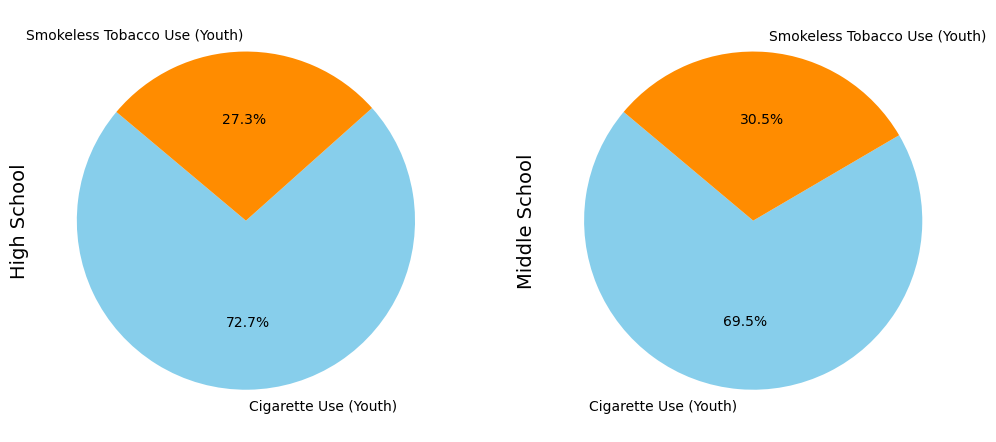

In [76]:
HighSchool_data = tobacco_df[(tobacco_df['Education'] == 'High School')
                            & (tobacco_df['Gender'] != 'Overall')]
MiddleSchool_data = tobacco_df[(tobacco_df['Education'] == 'Middle School')
                              & (tobacco_df['Gender'] != 'Overall')]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
HighSchool_data.groupby('TopicDesc')['Data_Value'].sum().plot(kind='pie', autopct='%1.1f%%', startangle=140, 
                    ax=axes[0], colors=['skyblue', 'darkorange'])
axes[0].set_ylabel('High School', fontsize=14)

MiddleSchool_data.groupby('TopicDesc')['Data_Value'].sum().plot(kind='pie', autopct='%1.1f%%', startangle=140, 
                    ax=axes[1], colors=['skyblue', 'darkorange'])
axes[1].set_ylabel('Middle School', fontsize=14);

- Từ biểu đồ trên ta hiểu được rằng trong khoảng thời gian từ 2000 - 2016, đối với các mẫu thử không phân biệt về giá trị của cột **Gender** thì ở **High School** thuốc lá không khói ít phổ biến hơn ở **Middle School**

## Sự thay đổi về loại thuốc lá được lựa chọn để tiêu thụ từ năm 200 - 2016

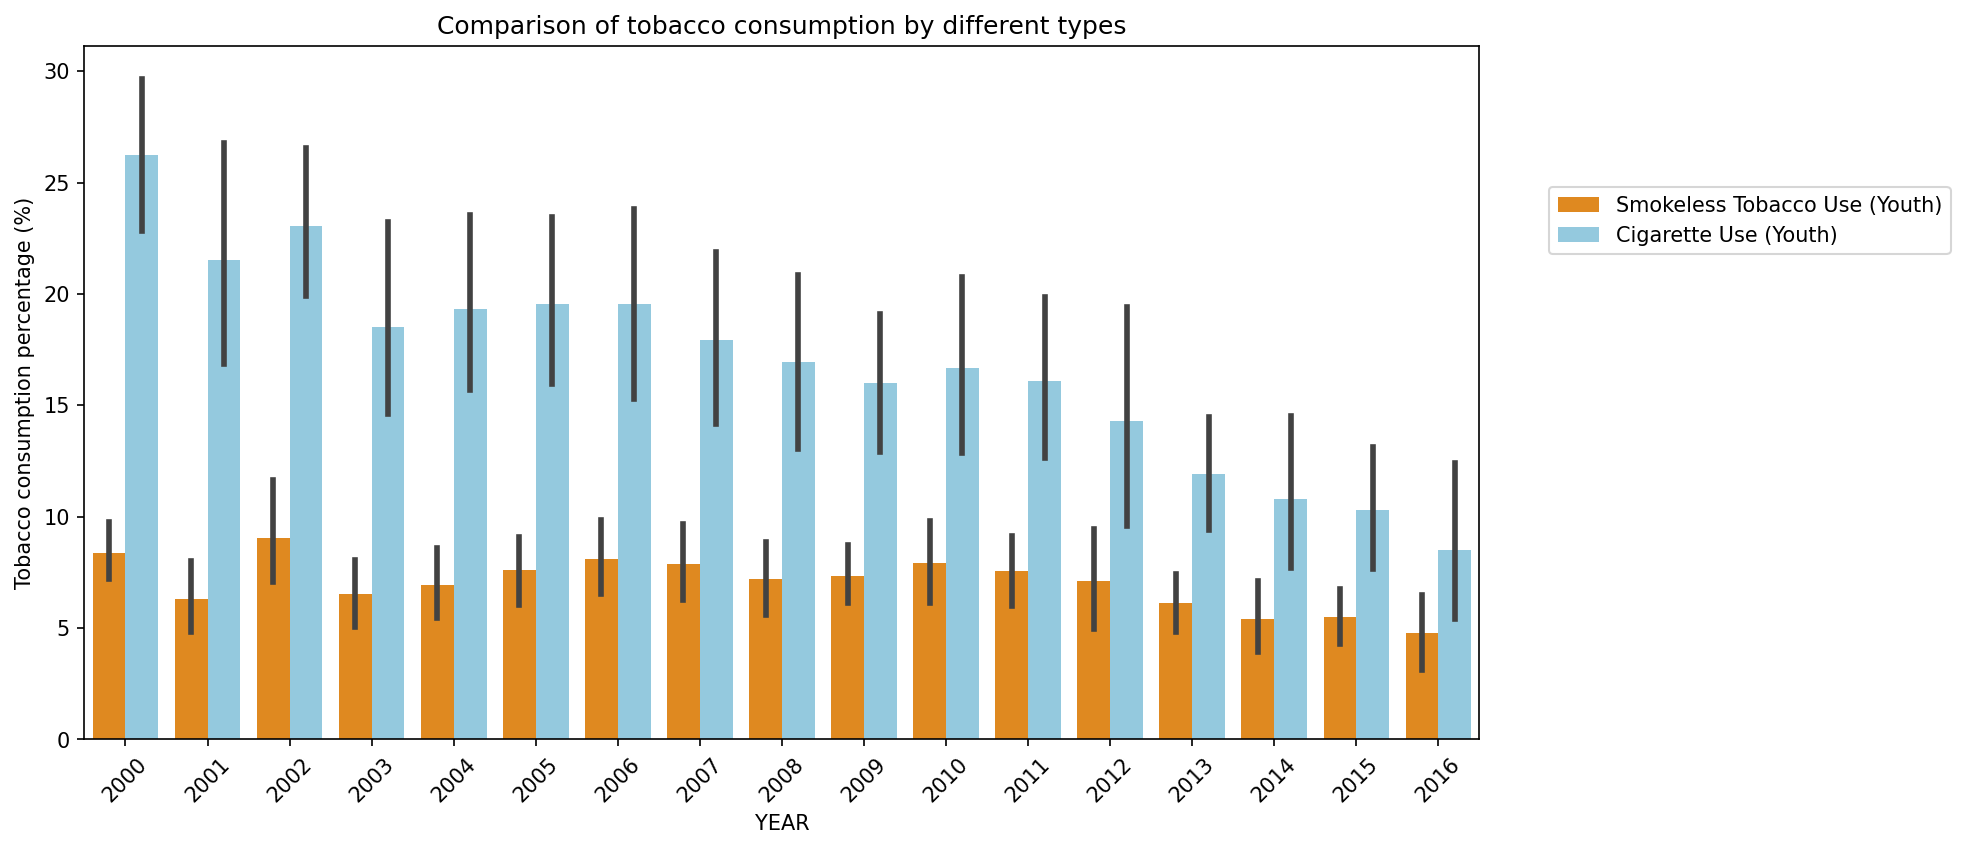

In [90]:
# Lọc các khảo sát không có quy định về giới tính
tobacco_df = tobacco_df[tobacco_df['Gender'] == 'Overall']

# Chọn màu cho các cột
palette_colors = {
    "Cigarette Use (Youth)": "skyblue",
    "Smokeless Tobacco Use (Youth)": "darkorange",
}

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 6), dpi=150)
sns.barplot(data=tobacco_df, x='YEAR', y='Data_Value', hue='TopicDesc', palette = palette_colors)
plt.xlabel('YEAR')
plt.ylabel('Tobacco consumption percentage (%)')
plt.title('Сomparison of tobacco consumption by different types')
plt.xticks(rotation=45)
plt.legend(title='TopicDesc')
plt.legend(loc=(1.05, 0.7));

Từ Barrplot trên ta nhận thấy rằng:

- **Smokeless Tobacco** không có sự thay đổi quá lớn theo thời gian
- **Cigarette** đang dần giảm đi theo thời gian